In [1]:

#importing the necessary variables 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Housing.csv")

Saving Housing.csv to Housing.csv


Gathering the input variables

In [107]:
price = df.values[:, 0] #get output values from price column 
area = df.values[:, 1] #get input values from area column 
bedrooms = df.values[:, 2] #get input values from bedroom column 
bathrooms  = df.values[:, 3] #get input values from bathrooms column
stories  = df.values[:, 4] #get input values from stories column
mainroad = np.where(df.values[:, 5] == 'yes', 2, 1)
guestroom = np.where(df.values[:, 6] == 'yes', 2, 1)
basement = np.where(df.values[:, 7] == 'yes', 2, 1)
hotwaterheating = np.where(df.values[:, 8] == 'yes', 2, 1)
airconditioning = np.where(df.values[:, 9] == 'yes', 2, 1)
prefarea = np.where(df.values[:, 11] == 'yes', 2, 1)
parking  = df.values[:, 10] #get input values from parking column

# Mean Square Error

In [75]:
def mean_squared_error (price, price_est): 
    difference = price - price_est  #finding the difference between observed and predicted valu
    squared_difference = difference**2  #taking square of the differene 
    summation = squared_difference.sum()  #taking a sum of all the differences 
    MSE = summation/len(price)  #dividing summation to obtain average 
    return MSE 


#Gradient Descent 1a

Creating a gradient descent off the model of : y=B3*bathrooms_i+B2*bedrooms_i+B1*area_i+B0.

With the current inputs it can be shown as price = B5*(parking_i)^5+B4*(stories_i)^4+B3*(bathrooms_i)^3+B2*(bedrooms_i)^2+B1*(area_i)+B0

In [77]:
def gradient_decsent_1a(area, bedrooms, bathrooms, stories, parking, price, lr, i_iter): 
    beta0 = 0 #initializing parameters to 0 
    beta1 = 0 #initializing parameters to 0, this is for area value
    beta2 = 0 #initializing parameters to 0, this is for bedrooms value
    beta3 = 0 #initializing parameters to 0, this is for bathrooms value
    beta4 = 0 #initializing parameters to 0, this is for stories value
    beta5 = 0 #initializing parameters to 0, this is for parking value
    losses = [] 
    betas = [] 
    for i in range (i_iter): 
      price_est = beta5*parking + beta4*stories + beta3*bathrooms + beta2*bedrooms + beta1*area + beta0 
      loss = mean_squared_error(price, price_est) 
      beta0 = beta0 - (lr*-2*(price-price_est)/len(price)) 
      beta1 = beta1 - (lr*-2*(area.dot(price-price_est))/len(price)) 
      beta2 = beta2 - (lr*-2*(bedrooms.dot(price-price_est))/len(price)) 
      beta3 = beta3 - (lr*-2*(bathrooms.dot(price-price_est))/len(price))
      beta4 = beta4 - (lr*-2*(stories.dot(price-price_est))/len(price)) 
      beta5 = beta5 - (lr*-2*(parking.dot(price-price_est))/len(price))  
      losses.append(loss) 
      betas.append((beta0, beta1, beta2, beta3, beta4, beta5)) 
    return betas, losses


# Problem 1

## 1a

In [86]:
betas, losses = gradient_decsent_1a(area, bedrooms, bathrooms,stories, parking, price, .01, 26 )
print ("price_est = ", betas[25][5], "* (parking) + ", betas[25][4], "* (stories) + ", betas[25][3], "* (Bathrooms) + " , betas[25][2], "* (bedrooms) + ", betas[25][1], "* (area) + ", betas[25][0])

price_est =  -5.616650414075732e+149 * (parking) +  -1.255414333010409e+150 * (stories) +  -9.074326450505082e+149 * (Bathrooms) +  -2.0595563149189706e+150 * (bedrooms) +  -4.1455618568988635e+153 * (area) +  -4.1455618568988635e+153


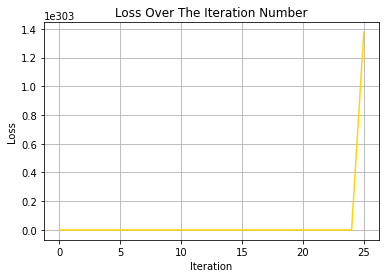

In [87]:
x_axis = np.arange(0., 26, 1)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Over The Iteration Number')
plt.plot(x_axis,losses,color='gold')


In [ ]:
def gradient_decsent_1a(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking,  price, prefarea

, lr, i_iter): 
    beta0 = 0 #initializing parameters to 0 
    beta1 = 0 #initializing parameters to 0, this is for area value
    beta2 = 0 #initializing parameters to 0, this is for bedrooms value
    beta3 = 0 #initializing parameters to 0, this is for bathrooms value
    beta4 = 0 #initializing parameters to 0, this is for stories value
    beta5 = 0 #initializing parameters to 0, this is for parking value
    losses = [] 
    betas = [] 
    for i in range (i_iter): 
      price_est = beta5*parking + beta4*stories + beta3*bathrooms + beta2*bedrooms + beta1*area + beta0 
      loss = mean_squared_error(price, price_est) 
      beta0 = beta0 - (lr*-2*(price-price_est)/len(price)) 
      beta1 = beta1 - (lr*-2*(area.dot(price-price_est))/len(price)) 
      beta2 = beta2 - (lr*-2*(bedrooms.dot(price-price_est))/len(price)) 
      beta3 = beta3 - (lr*-2*(bathrooms.dot(price-price_est))/len(price))
      beta4 = beta4 - (lr*-2*(stories.dot(price-price_est))/len(price)) 
      beta5 = beta5 - (lr*-2*(parking.dot(price-price_est))/len(price))  
      losses.append(loss) 
      betas.append((beta0, beta1, beta2, beta3, beta4, beta5)) 
    return betas, losses


## 1b

Gradient descent

In [105]:
def gradient_decsent_1b(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, price, lr, i_iter): 
    beta0 = 0 #initializing parameters to 0 
    beta1 = 0 #initializing parameters to 0, this is for area value
    beta2 = 0 #initializing parameters to 0, this is for bedrooms value
    beta3 = 0 #initializing parameters to 0, this is for bathrooms value
    beta4 = 0 #initializing parameters to 0, this is for stories value
    beta5 = 0 #initializing parameters to 0, this is for parking value
    beta6 = 0
    beta7 = 0
    beta8 = 0
    beta9 = 0
    beta10 = 0
    beta11 = 0  
    losses = [] 
    betas = [] 
    for i in range (i_iter): 
      price_est = beta11*prefarea + beta10*parking + beta9 * airconditioning + beta8 * hotwaterheating + beta7 * basement+ beta6*guestroom + \
      beta5 * mainroad + beta4*stories + beta3*bathrooms + beta2*bedrooms + beta1*area + beta0 
      loss = mean_squared_error(price, price_est) 
      beta0 = beta0 - (lr*-2*(price-price_est)/len(price)) 
      beta1 = beta1 - (lr*-2*(area.dot(price-price_est))/len(price)) 
      beta2 = beta2 - (lr*-2*(bedrooms.dot(price-price_est))/len(price)) 
      beta3 = beta3 - (lr*-2*(bathrooms.dot(price-price_est))/len(price))
      beta4 = beta4 - (lr*-2*(stories.dot(price-price_est))/len(price))
      beta5 = beta5 - (lr*-2*(mainroad.dot(price-price_est))/len(price)) 
      beta6 = beta6 - (lr*-2*(guestroom.dot(price-price_est))/len(price))
      beta7 = beta7 - (lr*-2*(basement.dot(price-price_est))/len(price))
      beta8 = beta8 - (lr*-2*(hotwaterheating.dot(price-price_est))/len(price))
      beta9 = beta9 - (lr*-2*(airconditioning.dot(price-price_est))/len(price))  
      beta10 = beta10 - (lr*-2*(parking.dot(price-price_est))/len(price))  
      losses.append(loss) 
      betas.append((beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, beta10, beta11)) 
    return betas, losses


In [110]:
betas, losses =  gradient_decsent_1b(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, price, .01, 26)

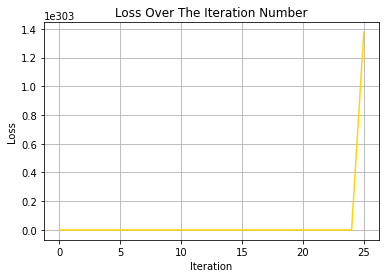

In [111]:
x_axis = np.arange(0., 26, 1)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Over The Iteration Number')
plt.plot(x_axis,losses,color='gold')


In [113]:
print("price_est = ",  betas[25][11], "* prefarea  + ", betas[25][10], " *parking + " ,betas[25][9], "* airconditioning + ", betas[25][8]," * hotwaterheating + ", betas[25][7]," * basement+ ", betas[25][6], " *guestroom + ", betas[25][5], " * mainroad + ", betas[25][4],"*stories + ", betas[25][3],"*bathrooms + ", betas[25][2],"*bedrooms + ",betas[25][1],"*area + ", betas[25][1] )

price_est =  0 * prefarea  +  -5.616688176375642e+149  *parking +  -9.29255282046557e+149 * airconditioning +  -7.145335421340015e+149  * hotwaterheating +  -9.298547289391444e+149  * basement+  -8.208615320675678e+149  *guestroom +  -1.2998116109977679e+150  * mainroad +  -1.255422818210955e+150 *stories +  -9.074387749916238e+149 *bathrooms +  -2.059570233623967e+150 *bedrooms +  -4.145589713547153e+153 *area +  -4.145589713547153e+153
